Resources:

Tutorial plot map with Basemap and regions 
http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/

Notebook
https://github.com/jamalmoir/notebook_playground/blob/master/uk_2015_houseprice.ipynb

Issue 285 Value Error when m.readshape
https://github.com/matplotlib/basemap/issues/285
http://fascicul.us/convert-display-shapefile-matplotlib.html

Basemap documentation
https://media.readthedocs.org/pdf/basemaptutorial/latest/basemaptutorial.pdf

Administrative areas data (ISTAT)
https://www.istat.it/it/archivio/124086

UNESCO Atlas of Languages
http://www.unesco.org/languages-atlas/index.php

Kaggle competition on Endangered Languages
https://www.kaggle.com/the-guardian/extinct-languages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [25]:
df = pd.read_csv('data.csv')
df.head(3)

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."


In [26]:
#retaining only the columns to be used for the map
new_df = df.filter(['Name in English', 'Countries', 'Degree of endangerment', \
                    'Number of speakers', 'Latitude', 'Longitude'])
new_df.head(3)

,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude
0,South Italian,Italy,Vulnerable,7500000.0,40.9798,15.2490
1,Sicilian,Italy,Vulnerable,5000000.0,37.4399,14.5019
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...",Vulnerable,4800000.0,53.4029,10.3601


In [27]:
#retaining only the rows related to languages endemic of Italy
ita_df = new_df[new_df['Countries'].str.contains('Italy', na=False)]
ita_df2 = ita_df[pd.notnull(df['Number of speakers'])]
ita_df2.head(3)

/home/giulia/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude
0,South Italian,Italy,Vulnerable,7500000.0,40.9798,15.2490
1,Sicilian,Italy,Vulnerable,5000000.0,37.4399,14.5019
4,Lombard,"Italy, Switzerland",Definitely endangered,3500000.0,45.7215,9.3273


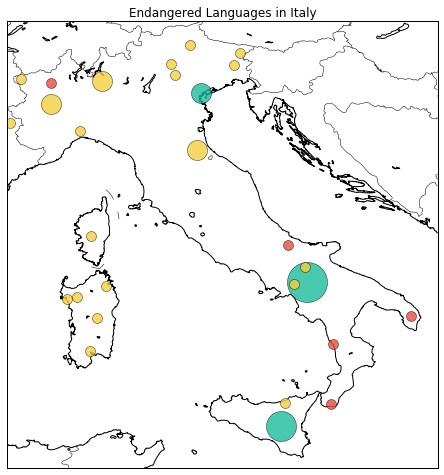

In [29]:
#PLOT STATIC MAP
#change size of marker in relation with number of speakers
def set_markersize(value, column_values):
    top_value = max(column_values)
    markersize = 0
    if value <= top_value * 0.25:
        markersize = 10
    elif value > top_value * 0.25 and value <= top_value * 0.5:
        markersize = 20
    elif value > top_value * 0.5 and value <= top_value * 0.75:
        markersize = 30
    elif value > top_value * 0.75 and value <= top_value :
        markersize = 40           
    return markersize

#change color in relation with endangerment severity
def set_color(value, column_values):
    colors = ['#F4D03F', '#1ABC9C', '#E74C3C']
    degrees = set(list(column_values))
    for color, degree in zip(colors, degrees):
        if value == degree:
            return color
        
plt.figure(figsize=(15,8))
m = Basemap(projection = 'mill', llcrnrlat = 36.39, urcrnrlat = 47.1, llcrnrlon = 6.61, urcrnrlon = 19.0, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

for index, row in ita_df2.iterrows():
    x, y = m(row['Longitude'], row['Latitude'])
    m.plot(x, y, 'go', markersize = set_markersize(row['Number of speakers'], ita_df2['Number of speakers']),\
            alpha = 0.8, color = set_color(row['Degree of endangerment'], ita_df2['Degree of endangerment']))

plt.title('Endangered Languages in Italy')

plt.show()

In [ ]:
#PLOT INTERACTIVE MAP
#ITALY
#Latitude: 41.2925 Longitude: 12.5736
#westlimit=6.61; southlimit=36.39; eastlimit=19.0; northlimit=47.1

import shapefile as shp
#from descartes import PolygonPatch
sf = shp.Reader("Limiti_2016_WGS84/Reg2016_WGS84/Reg_2016_WGS84.shp")

regions_names = [i[1] for i in sf.iterRecords()]

#regions = [i[1] for i in sf.iterRecords()]

for i in sf.shapeRecords():
    print(i.record, i.shape.points)
    
'''
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()
'''